### LAB WORK: Chest X-Ray Images - Medical Diagnosis with DenseNet

**Objectives:** Build a Convolutonal Neural Network (CNN) classifier to discriminate between 14 different pathologies from chest X-ray images using functions from Keras framework. 

 In particular, you will:
- Pre-process and prepare a real-world X-ray dataset
- Use a pretrained DenseNet CNN model for X-ray image classification
- Learn a technique to handle class imbalance
- Evaluate the model performance with test data

<img src="images/xray-header-image.png" style="padding-top: 50px;width: 87%;left: 0px;margin-left: 0px;margin-right: 0px;">

### 1. Import Packages and Functions¶

We will use modules from `keras` framework for building deep learning models.

Before instlling keras you need to install tensorflow !!! 
> pip istall tensorflow

> pip install keras

> pip install seaborn

> pip install opencv-python

In [7]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install opencv-python

  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [11]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)

import os

# for numerical manipulation
import numpy as np 

#for analyzing and manipulating data (https://pandas.pydata.org/docs/#)
import pandas as pd

#high-level interface for drawing attractive and informative 
#statistical graphics
import seaborn as sns

 #to produce plots for visualization
import matplotlib.pyplot as plt  

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

from keras.models import load_model

# util provides locally defined utility functions required for this lab work.
import util


###  2. Load Chest X-ray Images: Data Exploration and Image Preprocessing 

**Objectives**: Become familiar with Chest X-ray data set, that is a small part of the images in the  [ChestX-ray8 dataset](https://arxiv.org/abs/1705.02315) which contains 108,948 frontal-view X-ray images of 32,717 patients. 

The first step for any Machine Learning (ML) project is to explore the data.

- Each image in the data set contains labels for 14 different pathological conditions, that can be used by physicians to diagnose different diseases. 
- We will use this data to develop a binary classification model to predict 'positive' (pathology is present, label 1) or 'negative' (pathology is not present, label 0) for each of the 14 labeled pathologies. 
- The dataset consists of  422 images stored in folder **nih/images-small/**. 
- The dataset includes 3 CSV (Comma-Separated Values) files with the labels for each X-ray: 

1. `nih/train-small.csv`: training images.
1. `nih/valid-small.csv`: validation images.
1. `nih/test.csv`:testing images . 

#### Several meanings of word  'class'
The word **'class'** is used in multiple ways is this lab. 
- We sometimes refer to each of the 14 pathological conditions that are labeled in our dataset as a class. 
- But for each of those pathologies we are attempting to predict whether a certain condition is present (i.e. positive result) or absent (i.e. negative result). 
    - These two possible labels of 'positive' or 'negative' (or the numerical equivalent of 1 or 0) are also typically referred to as classes. 
- Moreover, we also use the term in reference to software code 'classes' such as `ImageDataGenerator`.

As long as you are aware of all this though, it should not cause you any confusion as the term 'class' is usually clear from the context in which it is used.


In [12]:
# Read the csv file containing training data with pandas library 
train_df = pd.read_csv("nih/train-small.csv")

# Print the first few rows of train_df => dictionary with several keys 
print(f'There are {train_df.shape[0]} rows and {train_df.shape[1]} columns in this data frame')
train_df.head()

# Do the same for validation and testing data

valid_df = ?

test_df = ?


SyntaxError: invalid syntax (3779085116.py, line 10)

In [21]:
# My Cell

# Read the csv file containing training data with pandas library 
train_df = pd.read_csv("nih/train-small.csv")



# Read the csv file containing validation data
valid_df = pd.read_csv("nih/valid-small.csv")

# Read the csv file containing testing data
test_df = pd.read_csv("nih/test.csv")

# Print the first few rows of train_df => dictionary with several keys 
print(f'There are {train_df.shape[0]} rows and {train_df.shape[1]} columns in this data frame')
train_df.head()


There are 1000 rows and 16 columns in this data frame


,Image,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,PatientId,Pleural_Thickening,Pneumonia,Pneumothorax
0,00008270_015.png,0,0,0,0,0,0,0,0,0,0,0,8270,0,0,0
1,00029855_001.png,1,0,0,0,1,0,0,0,1,0,0,29855,0,0,0
2,00001297_000.png,0,0,0,0,0,0,0,0,0,0,0,1297,1,0,0
3,00012359_002.png,0,0,0,0,0,0,0,0,0,0,0,12359,0,0,0
4,00017951_001.png,0,0,0,0,0,0,0,0,1,0,0,17951,0,0,0


In [18]:
# 14 pathological conditions 

labels = ['Cardiomegaly', 
          'Emphysema', 
          'Effusion', 
          'Hernia', 
          'Infiltration', 
          'Mass', 
          'Nodule', 
          'Atelectasis',
          'Pneumothorax',
          'Pleural_Thickening', 
          'Pneumonia', 
          'Fibrosis', 
          'Edema', 
          'Consolidation']

train_df.keys()
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Image               1000 non-null   object
 1   Atelectasis         1000 non-null   int64 
 2   Cardiomegaly        1000 non-null   int64 
 3   Consolidation       1000 non-null   int64 
 4   Edema               1000 non-null   int64 
 5   Effusion            1000 non-null   int64 
 6   Emphysema           1000 non-null   int64 
 7   Fibrosis            1000 non-null   int64 
 8   Hernia              1000 non-null   int64 
 9   Infiltration        1000 non-null   int64 
 10  Mass                1000 non-null   int64 
 11  Nodule              1000 non-null   int64 
 12  PatientId           1000 non-null   int64 
 13  Pleural_Thickening  1000 non-null   int64 
 14  Pneumonia           1000 non-null   int64 
 15  Pneumothorax        1000 non-null   int64 
dtypes: int64(15), object(1)
m

### Explore data labels
The csv file has 16 columns: "Image" column with the names of the chest x-ray images, "PatientId" column with the patient ID and 14 other (binary) columns filled with 1 or 0 to identify if the pathology is present (1) or not (0) in this x-ray image.

Run the next cell to print out the number of positive labels (1's) for each condition (pathology). 

In [17]:
class_counts=train_df.sum().drop(['Image','PatientId'])

for column in class_counts.keys():
    print(f" Class (pathology) {column} has {train_df[column].sum()} images (samples)")
   

 Class (pathology) Atelectasis has 106 images (samples)
 Class (pathology) Cardiomegaly has 20 images (samples)
 Class (pathology) Consolidation has 33 images (samples)
 Class (pathology) Edema has 16 images (samples)
 Class (pathology) Effusion has 128 images (samples)
 Class (pathology) Emphysema has 13 images (samples)
 Class (pathology) Fibrosis has 14 images (samples)
 Class (pathology) Hernia has 2 images (samples)
 Class (pathology) Infiltration has 175 images (samples)
 Class (pathology) Mass has 45 images (samples)
 Class (pathology) Nodule has 54 images (samples)
 Class (pathology) Pleural_Thickening has 21 images (samples)
 Class (pathology) Pneumonia has 10 images (samples)
 Class (pathology) Pneumothorax has 38 images (samples)


It is clear that the data set is not balanced. 

### Data Visualization - Display some images

In [22]:
imag = []
imag.append('00008270_015.png')
imag.append('00000116_034.png')
imag.append("00000359_010.png")
imag.append("00000121_008.png")
imag.append('00000003_001.png')


Display some images


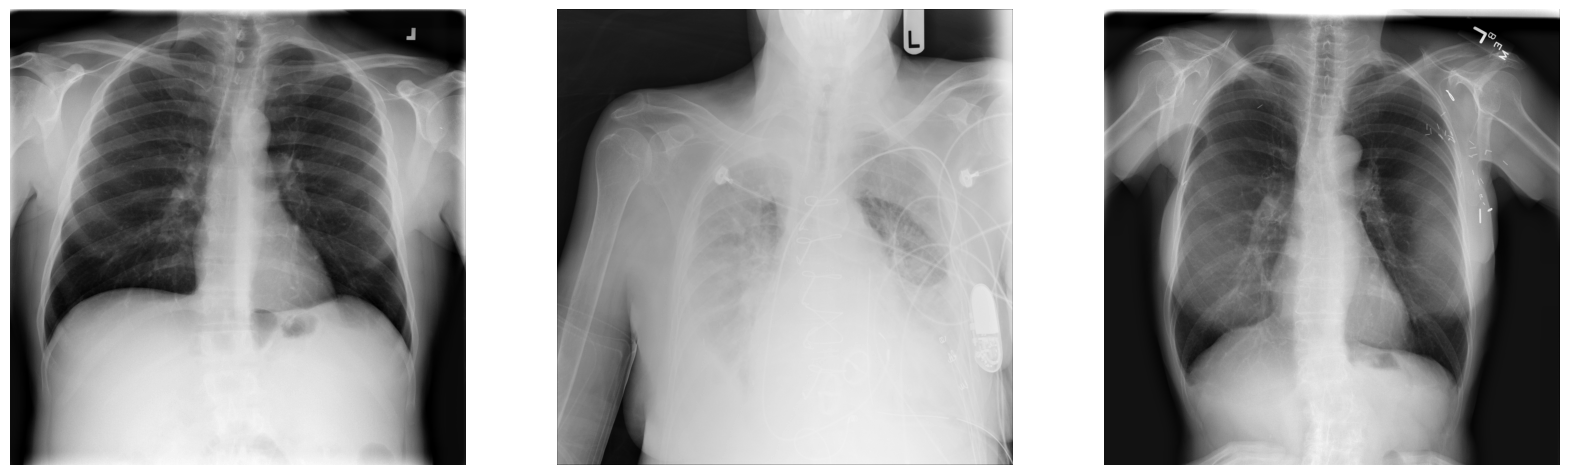

In [23]:
# Location of the image directory
IMAGE_DIR = "nih/images-small/"

print('Display some images')

# Adjust the size of the images
plt.figure(figsize=(20,10))

for i in range(3):
    plt.subplot(1, 3, i + 1)
    img = plt.imread(os.path.join(IMAGE_DIR, imag[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

### Investigate a single image
Run the cell below to look at one image and print out some details of the image contents.

 Image dimension: 1024 pixels width and 1024 pixels height, 1 color (gray) channel

 Pixel values range: max= 0.9804 , min= 0.0000

 Mean pixel value = 0.4796,  standard deviation = 0.2757


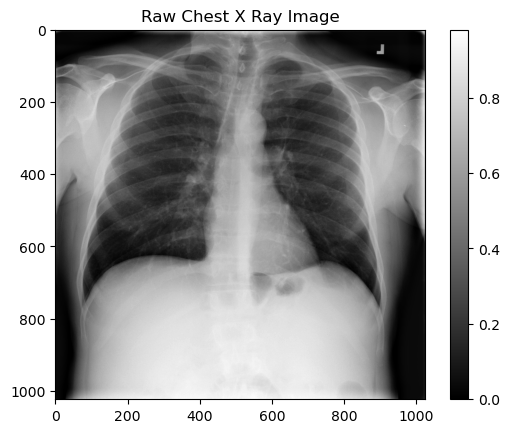

In [24]:
# Get the name of the image 
sample_img = imag[0]

raw_image = plt.imread(os.path.join(IMAGE_DIR, sample_img))
plt.imshow(raw_image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f" Image dimension: {raw_image.shape[0]} pixels width and {raw_image.shape[1]} pixels height, 1 color (gray) channel")
print()
print(f" Pixel values range: max= {raw_image.max():.4f} , min= {raw_image.min():.4f}")
print()
print(f" Mean pixel value = {raw_image.mean():.4f},  standard deviation = {raw_image.std():.4f}")

### Investigate pixel value distribution
Run the cell below to plot up the distribution of pixel values in the image shown above. 

Text(0.5, 1.0, 'Distribution of Pixel Intensities in the Image')

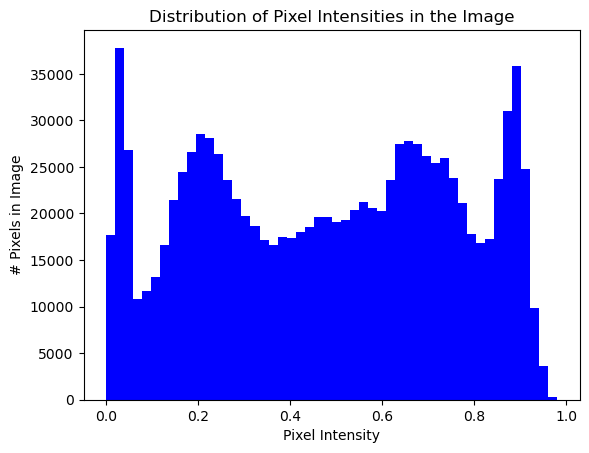

In [25]:
# histogram
plt.hist(raw_image.ravel(), bins=50, color='blue')

# Place legends
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')
plt.title('Distribution of Pixel Intensities in the Image')

###  3. Preparing Images

- We will use now [ImageDataGenerator](https://keras.io/preprocessing/image/) class from Keras framework, which allows to build a "generator" for images specified in a dataframe. 
- This class also provides support for basic data augmentation such as random horizontal flipping of images.
- We also use the generator to normalize the values in each batch (train, validate, test sets) so that their mean is $0$ and their standard deviation is 1. In other words, the generator will replace each pixel value in the image with a new value calculated by subtracting the mean and dividing by the standard deviation.  This will facilitate model training by standardizing the input distribution. 

$$\frac{x_i - \mu}{\sigma}$$

- The generator also converts a single channel X-ray images (gray-scale) to a 3-channel format by repeating the values in the image across all channels, because the pre-trained model that we'll use requires 3-channel inputs.

The implemented generator below will
1. Normalize the mean and standard deviation of the data
3. Shuffle the input after each epoch.
4. Set the image size to be 320px by 320px

In [26]:
def get_train_generator(df, image_dir, x_col, y_cols, shuffle=True, 
    batch_size=8, seed=1, target_w = 320, target_h = 320):
    
    """
    Return generator for training set, normalizing using batch statistics.

    Args:
      train_df (dataframe): dataframe specifying training data.
      image_dir (str): directory where image files are held.
      x_col (str): name of column in df that holds filenames.
      y_cols (list): list of strings that hold y labels for images.
      batch_size (int): images per batch to be fed into model during training.
      seed (int): random seed.
      target_w (int): final width of input images.
      target_h (int): final height of input images.
    
    Returns:
        train_generator (DataFrameIterator): that transforms the entire training set
    """        
    print("Train images:")
    # normalize images
    image_generator = ImageDataGenerator(
        samplewise_center=True,
        samplewise_std_normalization= True)
    
    # flow from directory with specified batch size
    # and target image size
    generator = image_generator.flow_from_dataframe(
            dataframe=df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=shuffle,
            seed=seed,
            target_size=(target_w,target_h))
    
    return generator

Now we build a new generator to transform (normalize) the validation and testing data. 
We can't use the same generator as for the training data because the test data has to be normalized using the statistics computed from the training set. 

In [27]:
def get_test_and_valid_generator(valid_df, test_df, train_df, image_dir,
    x_col, y_cols, sample_size=100, batch_size=8, seed=1, 
    target_w = 320, target_h = 320):
    
    """
    Return generator for validation set and test test set using 
    normalization statistics from training set.

    Args:
      valid_df (dataframe): dataframe specifying validation data.
      test_df (dataframe): dataframe specifying test data.
      train_df (dataframe): dataframe specifying training data.
      image_dir (str): directory where image files are held.
      x_col (str): name of column in df that holds filenames.
      y_cols (list): list of strings that hold y labels for images.
      sample_size (int): size of sample to use for normalization 
      statistics.
      batch_size (int): images per batch to be fed into model during 
      training.
      seed (int): random seed.
      target_w (int): final width of input images.
      target_h (int): final height of input images.
    
    Returns:
        test_generator (DataFrameIterator) and valid_generator: 
        iterators over test set and validation set respectively
    """
     # Generator of train images
    print("Train images:")
    # get generator to sample dataset
    raw_train_generator = ImageDataGenerator().flow_from_dataframe(
        dataframe=train_df, 
        directory=IMAGE_DIR, 
        x_col="Image", 
        y_col=labels, 
        class_mode="raw", 
        batch_size=sample_size, 
        shuffle=True, 
        target_size=(target_w, target_h))
    
    # get data sample (1 image) 
    batch = raw_train_generator.next()
    data_sample = batch[0]

    # use 1 sample (1 image) to fit mean and std for test set generator
    image_generator = ImageDataGenerator(
        featurewise_center=True,
        featurewise_std_normalization= True)
    
    # fit generator to sample from training data
    image_generator.fit(data_sample)

    # Generator of validation images
    print("Validation images:")
    valid_generator = image_generator.flow_from_dataframe(
            dataframe=valid_df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=False,
            seed=seed,
            target_size=(target_w,target_h))

    # Generator of test images
    print("Test images:")
    test_generator = image_generator.flow_from_dataframe(
            dataframe=test_df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=False,
            seed=seed,
            target_size=(target_w,target_h))
    return valid_generator, test_generator

Apply the generator function to preprocess the training, validation and test data

**Note:** The train_df csv file has a list of 1000 images, however in the directory we only have 296 training images, therefore it prints a warning message. and validation datasets.

In [31]:
# Call the generators to prepare the training, validation, and test data
train_generator = get_train_generator(train_df, IMAGE_DIR,
                                      x_col="Image", y_cols=labels,
                                      shuffle=True, batch_size=8, seed=1,
                                      target_w=320, target_h=320)

valid_generator, test_generator = get_test_and_valid_generator(valid_df, test_df, train_df, IMAGE_DIR,
                                                              x_col="Image", y_cols=labels,
                                                              sample_size=100, batch_size=8, seed=1,
                                                              target_w=320, target_h=320)


Train images:
Found 296 validated image filenames.
Train images:
Found 296 validated image filenames.


E:\Software\Anaconda\lib\site-packages\keras\preprocessing\image.py:1137: UserWarning: Found 704 invalid image filename(s) in x_col="Image". These filename(s) will be ignored.
  warnings.warn(
E:\Software\Anaconda\lib\site-packages\keras\preprocessing\image.py:1137: UserWarning: Found 704 invalid image filename(s) in x_col="Image". These filename(s) will be ignored.
  warnings.warn(


Validation images:
Found 65 validated image filenames.
Test images:
Found 124 validated image filenames.


E:\Software\Anaconda\lib\site-packages\keras\preprocessing\image.py:1137: UserWarning: Found 135 invalid image filename(s) in x_col="Image". These filename(s) will be ignored.
  warnings.warn(
E:\Software\Anaconda\lib\site-packages\keras\preprocessing\image.py:1137: UserWarning: Found 296 invalid image filename(s) in x_col="Image". These filename(s) will be ignored.
  warnings.warn(


Let's see an example of what the generator gives to the model by `__getitem__(index)` function:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


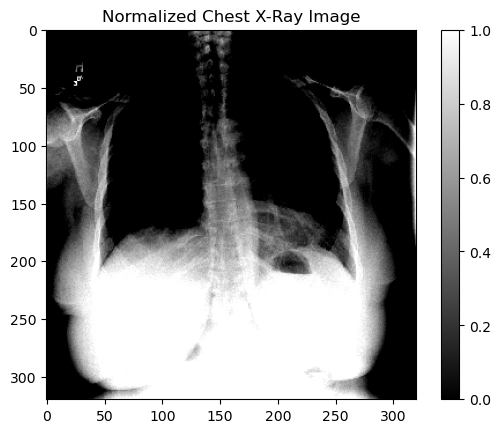

In [32]:
# Plot one normalized image

generated_image, label = train_generator.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')  
plt.colorbar()
plt.title('Normalized Chest X-Ray Image')

# What is the shape of the generated_image ? 
# What is the meaning of each dimension ?
?

# What is the pixel values range (max, min) of the normalized images ?
?

# What is the Mean pixel value and the standard deviation ?

?



In [33]:
# Shape of the generated_image
print("Shape of generated_image:", generated_image.shape)
# The meaning of each dimension:
# - The first dimension represents the batch size (number of images in the batch).
# - The second and third dimensions represent the width and height of the image.
# - The fourth dimension represents the number of channels (1 for grayscale images).

# Pixel value range (max and min) of the normalized images
print("Pixel value range: (min, max) =", generated_image.min(), generated_image.max())

# Mean pixel value and standard deviation of the normalized images
mean_value = np.mean(generated_image)
std_value = np.std(generated_image)
print("Mean pixel value:", mean_value)
print("Standard deviation:", std_value)


Shape of generated_image: (8, 320, 320, 3)
Pixel value range: (min, max) = -3.177736 2.4269931
Mean pixel value: -1.7245611e-07
Standard deviation: 0.99999976


In [34]:
# histogram of the distribution of the pixels

#plt.figure(figsize=(10, 7))

# Plot histogram for original image
plt.hist(raw_image.ravel(), bins=50, color='blue')

# Plot histogram for normalized image
 ?

# Place legends
?

IndentationError: unexpected indent (2525332087.py, line 9)

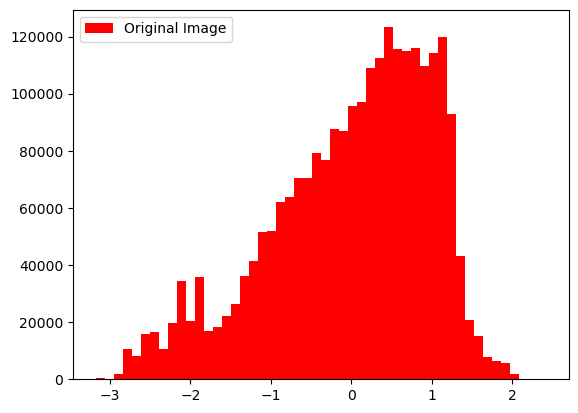

In [35]:
# Plot histogram for normalized image
plt.hist(generated_image.ravel(), bins=50, color='red')

# Add legends
plt.legend(['Original Image', 'Normalized Image'])


### 4. Addressing Class Imbalance
One of the challenges with medical datasets is the large class imbalance. Let's plot the frequency of each of the labels in our dataset:

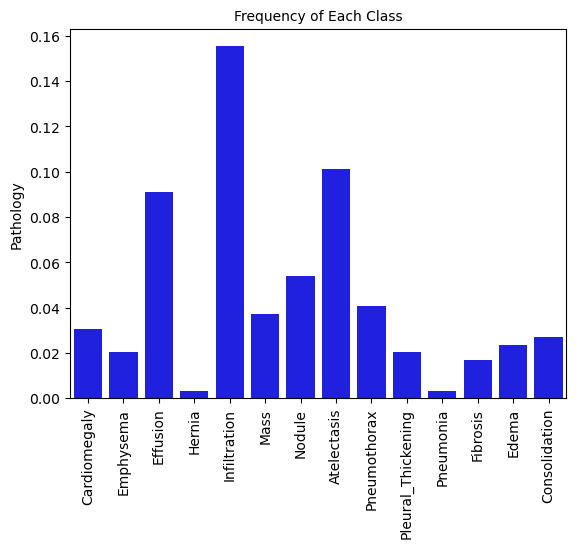

In [37]:
# Plot the class frequency
plt.xticks(rotation=90)

sns.barplot(x=labels, y=np.mean(train_generator.labels, axis=0), color='b')
# or sns.barplot(x=np.mean(train_generator.labels, axis=0), y=labels, color='b')
plt.title("Frequency of Each Class", fontsize=10)
plt.ylabel('Pathology', fontsize=10)
plt.show()


We can see from this plot that the presence of different pathologies (classes) varies significantly. (The same trend happens in the full dataset as well.) 
* The `Hernia` pathology has the greatest imbalance with the proportion of positive training cases being about 0.2%. 
* Even the `Infiltration` pathology, has about 15.5% of the training cases labelled positive.

If we use a normal cross-entropy loss function with this highly unbalanced dataset, the algorithm will be incentivized to prioritize the majority class (i.e negative in our case), since it contributes more to the loss. 

#### Impact of class imbalance on loss function

 We will use a cross-entropy loss for each pathology. The normal cross-entropy loss from the $i^{th}$ training example is:

$$\mathcal{L}_{cross-entropy}(x_i) = -(y_i \log(f(x_i)) + (1-y_i) \log(1-f(x_i))),$$

where $x_i$ are the input features and $y_i$ is the label, and $f(x_i)$ is the output of the model, i.e. the probability that it is positive (1) or negative (0). 

For any training case, either $y_i=0$ or $y_i=1$ , so only one term contributes to the loss (the other term is multiplied by zero). 

The average cross-entropy loss over the entire training set $\mathcal{D}$ of size $N$ is as follows: 

$$\mathcal{L}_{cross-entropy}(\mathcal{D}) = - \frac{1}{N}\big( \sum_{\text{positive examples}} \log (f(x_i)) + \sum_{\text{negative examples}} \log(1-f(x_i)) \big).$$

We can see that if there is a large imbalance with very few positive training cases, then the loss will be dominated by the negative class. Summing the contribution over all the training cases for each class (i.e. pathological condition), we see that the contribution of each class (i.e. positive or negative) is: 

$$freq_{p} = \frac{\text{number of positive examples}}{N} $$

$$\text{and}$$

$$freq_{n} = \frac{\text{number of negative examples}}{N}.$$


### Computing Class Frequencies
Complete the function below to calculate these frequences for each label in the dataset.

Use numpy.sum(a, axis= ?), and choose the axis (0 or 1) </li>

In [38]:
def compute_class_freqs(labels):
    """
    Compute positive and negative frequencies for each class.

    Args:
        labels (np.array): matrix of labels, size (num_examples, num_classes)
        
    Returns:
        positive_frequencies (np.array): array of positive frequencies for each class, size (num_classes)
        negative_frequencies (np.array): array of negative frequencies for each class, size (num_classes)
    """
    
    # Total number of patients (rows)
    N = labels.shape[0]
    
    positive_frequencies = np.sum(labels, axis=0) / N
    negative_frequencies = 1 - positive_frequencies

    return positive_frequencies, negative_frequencies


Compute the frequencies for our training data.

In [39]:
freq_pos, freq_neg = compute_class_freqs(train_generator.labels)


Let's visualize these two contribution ratios next to each other for each of the pathologies:

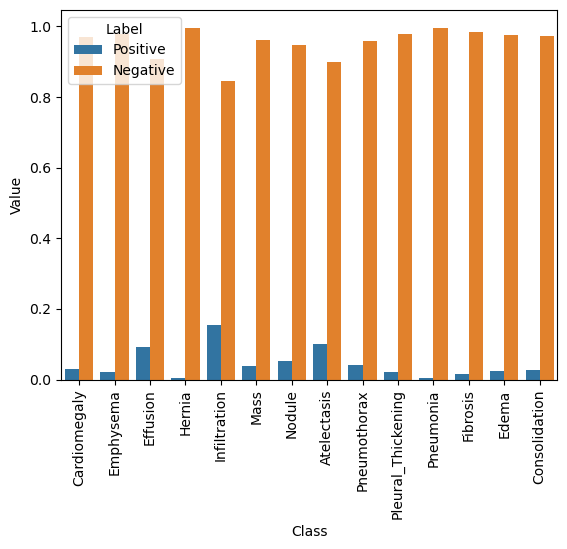

In [40]:
data = pd.DataFrame({"Class": labels, "Label": "Positive", "Value": 
                     freq_pos})

data = data.append([{"Class": labels[l], "Label": "Negative", "Value": 
    v} for l,v in enumerate(freq_neg)], ignore_index=True)

plt.xticks(rotation=90)

f = sns.barplot(x="Class", y="Value", hue="Label" ,data=data)

As we see in the above plot, the contributions of positive cases is significantly lower than that of the negative ones. However, we want the contributions to be equal. One way of doing this is by multiplying each example from each class by a class-specific weight factor, $w_{pos}$ and $w_{neg}$, so that the overall contribution of each class is the same. 


$$pos\_contribution=w_{pos} \times freq_{p} = w_{neg} \times freq_{n} =neg\_contribution$$

$$w_{pos} = freq_{neg}$$
$$w_{neg} = freq_{pos}$$

This way, we will be balancing the contribution of positive and negative labels.

In [41]:
pos_w = freq_neg
neg_w = freq_pos

pos_contribution = neg_w
neg_contribution = pos_w


Verify that now the contribution of the positive and negative labels is equal. It is expected to get a similar plot as the one below. 

<img src="images/f_bal_contr.png" alt="U-net Image" width="300" align="middle"/>«

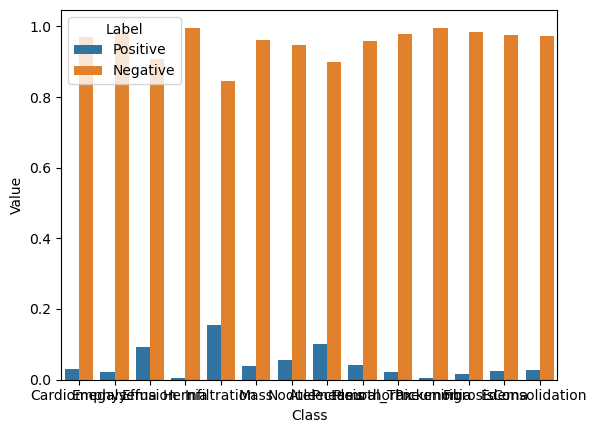

In [42]:


f = sns.barplot(x="Class", y="Value", hue="Label" ,data=data)

As the above figure shows, by applying these weightings the positive and negative labels within each class would have the same aggregate contribution to the loss function. 
After computing the weights, the final weighted loss for each training case will be 

$$\mathcal{L}_{cross-entropy}^{w}(x) = - (w_{p} y \log(f(x)) + w_{n}(1-y) \log( 1 - f(x) ) ).$$

### Computing the Weighted Loss
The function below computes the average weighted loss for all training examples (batch data). For the multi-class loss, the average loss for each individual class is computed. The small value, $\epsilon$, is added to the predicted values before taking their logs. This is to avoid a numerical error that would otherwise occur if the predicted value happens to be zero.


In [43]:
def get_weighted_loss(pos_weights, neg_weights, epsilon=1e-7):
    """
    Return weighted loss function given negative weights and 
    positive weights.

    Args:
      pos_weights (np.array): array of positive weights for each class, size (num_classes)
      neg_weights (np.array): array of negative weights for each class, size (num_classes)
      epsilon: to avoid numerical errors if the predicted value = 0.
    
Returns:
      weighted_loss (function): weighted loss function
    """
    def weighted_loss(y_true, y_pred):
        """
        Return weighted loss value. 

Args:
 y_true (Tensor): Tensor of true labels, size is 
 (num_examples, num_classes)
 y_pred (Tensor): Tensor of predicted labels, size is (num_examples, 
 num_classes)
 
Returns:
    loss (Float): overall scalar loss summed across all classes
        """
        # initialize loss to zero
        loss = 0.0
        
        for i in range(len(pos_weights)):
# for each class, add average weighted loss for that class
#K.mean, K.log are Keras functions to calculate the mean and the log.
            
            loss_pos = -1 * K.mean(pos_weights[i] * y_true[:, i] * K.log(y_pred[:, i] + epsilon))
            loss_neg = -1 * K.mean(neg_weights[i] * (1 - y_true[:, i]) * K.log(1 - y_pred[:, i] + epsilon))
            
            loss += loss_pos + loss_neg 
        return loss
    
    return weighted_loss

### 5. DenseNet121 Model  (Consult p6_Part2_DenseNet.ipnb) 


We will use a pre-trained [DenseNet121](https://www.kaggle.com/pytorch/densenet121) model, loaded from Keras, and add 2 layers on top of it:
1. A `GlobalAveragePooling2D` layer to get the average of the last convolution layers from DenseNet121.
2. A `Dense` layer with `sigmoid` activation to get the predictions for each of the classes.

<img src="nih/densenet.png" alt="U-net Image" width="300" align="middle"/>«

We can set our custom loss function for the model by specifying the `loss` parameter in the `compile()` function.

In [44]:
# Create the base CNN model DenseNet121 and load it with the pretrained
# weights stored in the file densenet.hdf5

base_model = DenseNet121(weights='./nih/densenet.hdf5', include_top=False)

x = base_model.output

# add a global spatial average pooling layer
x = GlobalAveragePooling2D()(x)

# and a logistic layer
predictions = Dense(len(labels), activation="sigmoid")(x)

# Create an updated model with the added layers 
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss=get_weighted_loss(pos_weights, 
                                                    neg_weights))


NameError: name 'pos_weights' is not defined

In [45]:
# Create the base CNN model DenseNet121 and load it with the pretrained weights
base_model = DenseNet121(weights='./nih/densenet.hdf5', include_top=False)

x = base_model.output

# Add a global spatial average pooling layer
x = GlobalAveragePooling2D()(x)

# Add a logistic layer
predictions = Dense(len(labels), activation="sigmoid")(x)

# Create an updated model with the added layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compute the positive and negative weights
pos_weights = 1 / freq_pos
neg_weights = 1 / freq_neg

# Compile the model with weighted loss
model.compile(optimizer='adam', loss=get_weighted_loss(pos_weights, neg_weights))


### 6 Training [optional]

With the model ready for training, we can use the `model.fit()` function in Keras to train the classifier model. 
Since training can take a considerable time, we have chosen not to train the model here but rather to load a set of pre-trained weights in the next section. However, you can use the code shown below to practice training the model locally on your machine or in Colab.

Python Code for training the model:

```python
history = model.fit_generator(train_generator, 
                              validation_data=valid_generator,
                              steps_per_epoch=100, 
                              validation_steps=25, 
                              epochs = 3)

plt.plot(history.history['loss'])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("Training Loss Curve")
plt.show()
```


Let's load the pre-trained weights into the model:

In [46]:
model.load_weights("./nih/pretrained_model.h5")

### 7 Prediction and Evaluation

Now that we have a model, let's evaluate it with the test set. 

**Note:** Depending on your computer, the following cell may take some time to run.

In [47]:
predicted_vals = model.predict(test_generator, 
                            steps = len(test_generator))

#What is the dimension and the meaning of predicted_vals ?

# Dimension of predicted_vals
print("Dimension of predicted_vals:", predicted_vals.shape)


16/16 [==============================] - 31s 2s/step
Dimension of predicted_vals: (124, 14)


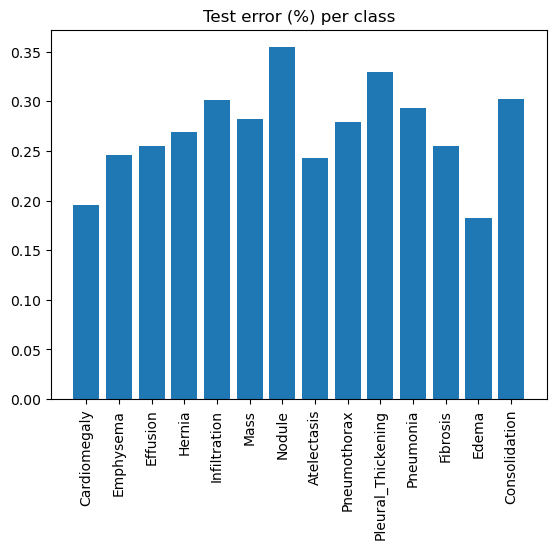

In [49]:
#The error between the predicted class and the given labels 
#(the ground truth)

e=predicted_vals-test_generator.labels

#error in %
em=np.sum(e,axis=0)/e.shape[0]

plt.xticks(rotation=90)
plt.bar(x=labels, height=em)
plt.title("Test error (%) per class")
plt.show()

#Compute the global mean test error of the model over all pathologies 

global_mean_test_error = np.mean(em)


### Compute and visualize train & validation errors per class. 

You are expected to get the following plots: 

<img src="images/Eval_class.png" alt="U-net Image" width="300" align="middle"/>«

<img src="images/Etrain_class.png" alt="U-net Image" width="300" align="middle"/>«


In [ ]:
# Results with the Validation set: 
# the plot and the global mean validation error of the model

?

In [ ]:
# Results with the Train set: 
# the plot and the global mean train error of the model

9/9 [==============================] - 14s 1s/step


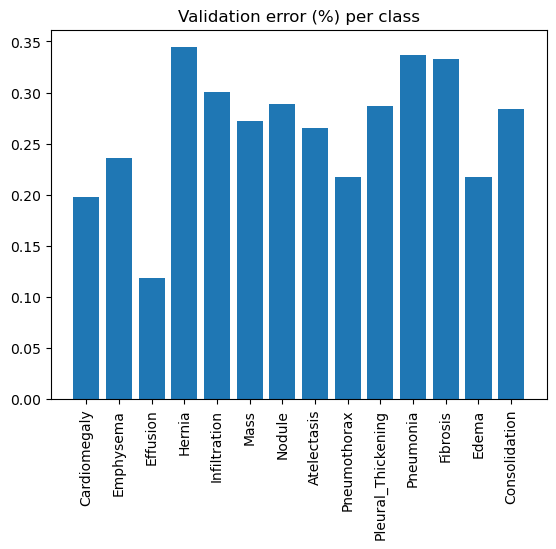

37/37 [==============================] - 78s 2s/step


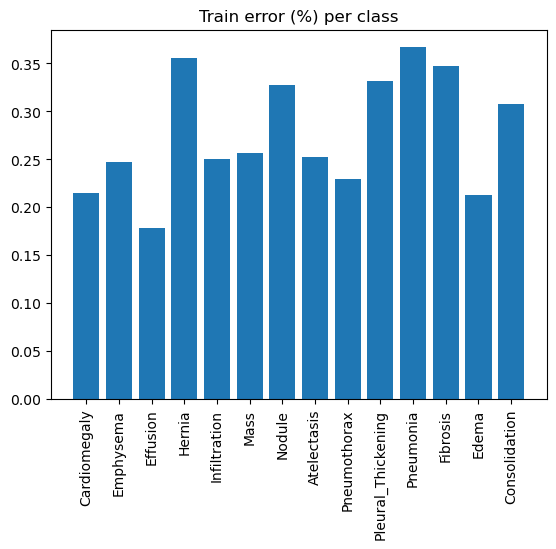

In [50]:
# Results with the Validation set
val_predicted_vals = model.predict(valid_generator, steps=len(valid_generator))

val_e = val_predicted_vals - valid_generator.labels
val_em = np.sum(val_e, axis=0) / val_e.shape[0]

plt.xticks(rotation=90)
plt.bar(x=labels, height=val_em)
plt.title("Validation error (%) per class")
plt.show()

val_global_mean_error = np.mean(val_em)

# Results with the Train set
train_predicted_vals = model.predict(train_generator, steps=len(train_generator))

train_e = train_predicted_vals - train_generator.labels
train_em = np.sum(train_e, axis=0) / train_e.shape[0]

plt.xticks(rotation=90)
plt.bar(x=labels, height=train_em)
plt.title("Train error (%) per class")
plt.show()

train_global_mean_error = np.mean(train_em)
